# What is Systemic Crisis ?

After going through some research papers and searching online here is my understaning of Systemic Crisis:
Systemic risk is a non-conventional risk which is a combination of economic and financial risk. It means that if the best banks are not functioning properly and the countries are in debt the chances are that they will face systemic crisis. It is like a graph where if one thing breaks it leads to downfall of others as well.

**A systemic crisis is a domino effect in which a financial trouble spreads. between institutions and markets until it affects the whole monetary. and financial system with dire global economic consequences**



![display image](https://media.giphy.com/media/PNut3rKlJyfTvhNkuu/giphy.gif)

**What is the point of Systemic Crisis forecasting ?**

the economic and financial data available can be used to understand the systemic risk which in turn can be used to forecast the crisis 1-2 years prior to it happening !! This can save the world.



---
I have used Jorda-Schularick-Taylor Macrohistory database to analyse the macroeconomic variables that can help in forecasting Systemic Crisis


## Data Analysis

Loading Libraries 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Retrival of Data

I have used the R3 version of the database that contains data for 16 countries


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import numpy as np 
import pandas as pd

**According to the description of the database:**

The variables given are divided into 5 different categories. The author states that these variables as a whole can help indicate systemic crisis. We explore each category with respect to Systemic Crisis and see if we can see any trend. These features alone cannot act as an early warning predictor.




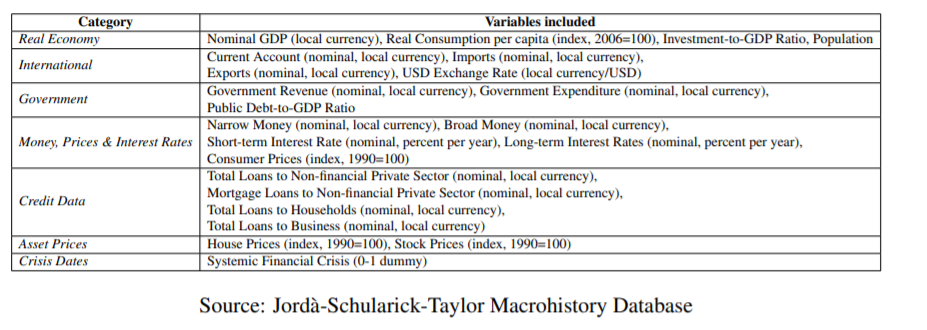

In [3]:
df_jst = pd.read_excel('JSTdatasetR3.xlsx', sheet_name="Data") 
df = df_jst.copy()
df.rename(columns={
        "crisisJST": "crisis",
        'stir': 'srate',
        'ltrate': 'lrate',
        'iy': 'inv_gdp',
        'debtgdp': 'pdebt_gdp',
        'money': 'bmon',
        'narrowm': 'nmon',
        'tloans': 'tloan',
        'tbus': 'bloan',
        'thh': 'hloan',
        'tmort': 'mort',
        'stocks': 'stock',
        'hpnom': 'hp',
        'rconpc': 'cons'
    }, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         2499 non-null   int64  
 1   country      2499 non-null   object 
 2   iso          2499 non-null   object 
 3   ifs          2499 non-null   int64  
 4   pop          2499 non-null   float64
 5   rgdpmad      2499 non-null   float64
 6   rgdppc       2499 non-null   float64
 7   cons         2411 non-null   float64
 8   gdp          2474 non-null   float64
 9   inv_gdp      2279 non-null   float64
 10  cpi          2499 non-null   float64
 11  ca           2344 non-null   float64
 12  imports      2458 non-null   float64
 13  exports      2458 non-null   float64
 14  nmon         2435 non-null   float64
 15  bmon         2349 non-null   float64
 16  srate        2351 non-null   float64
 17  lrate        2464 non-null   float64
 18  stock        2233 non-null   float64
 19  pdebt_

In [4]:
df.describe().T

count          mean  ...            75%           max
year         2499.0  1.943000e+03  ...    1980.000000  2.016000e+03
ifs          2499.0  1.465882e+02  ...     158.000000  1.930000e+02
pop          2499.0  3.195538e+04  ...   45613.500000  3.227833e+05
rgdpmad      2499.0  8.682645e+03  ...   14024.706784  3.635937e+04
rgdppc       2499.0  3.783206e+01  ...      61.578296  1.176452e+02
cons         2411.0  4.004322e+01  ...      64.933650  1.154359e+02
gdp          2474.0  2.177163e+06  ...   41508.000000  1.861064e+08
inv_gdp      2279.0  1.862891e-01  ...       0.228167  3.888761e-01
cpi          2499.0  3.767274e+01  ...      59.092515  2.200822e+02
ca           2344.0 -6.505673e+04  ...      12.077748  3.575104e+06
imports      2458.0  6.909603e+05  ...    8424.750000  5.700418e+07
exports      2458.0  6.603178e+05  ...    6698.500000  6.131574e+07
nmon         2435.0  8.648758e+05  ...    9728.500000  1.327760e+08
bmon         2349.0  2.096083e+06  ...   18130.000000  2.004951e+08
srate        2351.0  4.804489e+00  ...       5.795833  2.127330e+01
lrate        2464.0  5.528763e+00  ...       6.376499  2.371542e+01
stock        2233.0  7.171109e+01  ...      48.936509  1.218892e+03
pdebt_gdp    2322.0  5.345429e-01  ...       0.695885  2.697976e+00
revenue      2398.0  4.432283e+05  ...    8036.250000  3.449315e+07
expenditure  2417.0  5.094283e+05  ...    8100.000000  4.464453e+07
xrusd        2496.0  4.884827e+01  ...       6.255090  2.197061e+03
crisis       2499.0  3.601441e-02  ...       0.000000  1.000000e+00
tloan        2311.0  2.583752e+06  ...   20554.250000  3.111221e+08
mort         2186.0  1.349429e+06  ...   10240.575000  1.788609e+08
hloan        1309.0  2.094686e+06  ...  202374.812500  1.363387e+08
bloan        1234.0  2.605249e+06  ...  205372.976188  1.747835e+08
hp           1906.0  5.520556e+01  ...      84.034305  5.694367e+02

[27 rows x 8 columns]

In [5]:
 df.isnull().sum()

year              0
country           0
iso               0
ifs               0
pop               0
rgdpmad           0
rgdppc            0
cons             88
gdp              25
inv_gdp         220
cpi               0
ca              155
imports          41
exports          41
nmon             64
bmon            150
srate           148
lrate            35
stock           266
pdebt_gdp       177
revenue         101
expenditure      82
xrusd             3
crisis            0
tloan           188
mort            313
hloan          1190
bloan          1265
hp              593
dtype: int64

We have many Null values. One way to take care of null values is interpolate.


In [6]:
df.head()

year    country  iso  ifs     pop  ...   tloan   mort  hloan   bloan        hp
0  1870  Australia  AUS  193  1775.0  ...  54.792  1.680  1.680  53.112  0.492253
1  1871  Australia  AUS  193  1675.0  ...  53.748  1.766  1.766  51.982  0.469877
2  1872  Australia  AUS  193  1722.0  ...  55.822  1.470  1.470  54.352  0.484794
3  1873  Australia  AUS  193  1769.0  ...  65.380  1.364  1.364  64.016  0.469877
4  1874  Australia  AUS  193  1822.0  ...  71.478  1.434  1.434  70.044  0.566836

[5 rows x 29 columns]

In [7]:
 # Linear interpolation is performed for missing values
 df = df.interpolate()
 
 # Total number of crisis
print(df.crisis.value_counts() )    # 0 indicates no crisis, 1 indicates crisis
individual_countries = list(df['country'].unique())
print(individual_countries)
print("Number of countries:",len(individual_countries))

0    2409
1      90
Name: crisis, dtype: int64
['Australia', 'Belgium', 'Canada', 'Switzerland', 'Germany', 'Denmark', 'Spain', 'Finland', 'France', 'UK', 'Italy', 'Japan', 'Netherlands', 'Norway', 'Portugal', 'Sweden', 'USA']
Number of countries: 17


* There are 90 crisis that happened between 1870 and 2016.

* The bar chart shows total crisises counts in each country. The red bars highlight the countries where crisies count is greater than 5. It shows Italy has the highest count followed by Spain.

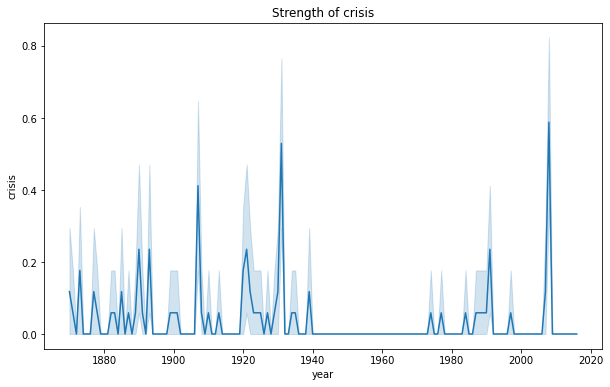

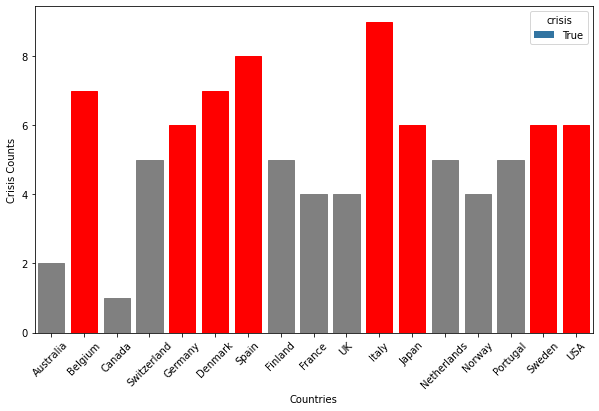

In [8]:
def_palette = sns.color_palette()
cat_palette = sns.color_palette("hls", 16)
fig, ax = plt.subplots(figsize = (10,6)) 
fig = sns.lineplot(x='year', y='crisis', data=df, palette=cat_palette, ax=ax).set_title('Strength of crisis')

# explore crisis by country
df_1 = df.loc[df['crisis'].eq(1)]
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(df_1['country'],hue=df_1['crisis'].eq(1),ax=ax)
for bar in ax.patches:
    if bar.get_height() > 5:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.xlabel('Countries')
plt.ylabel('Crisis Counts')
plt.xticks(rotation=45)
plt.show()

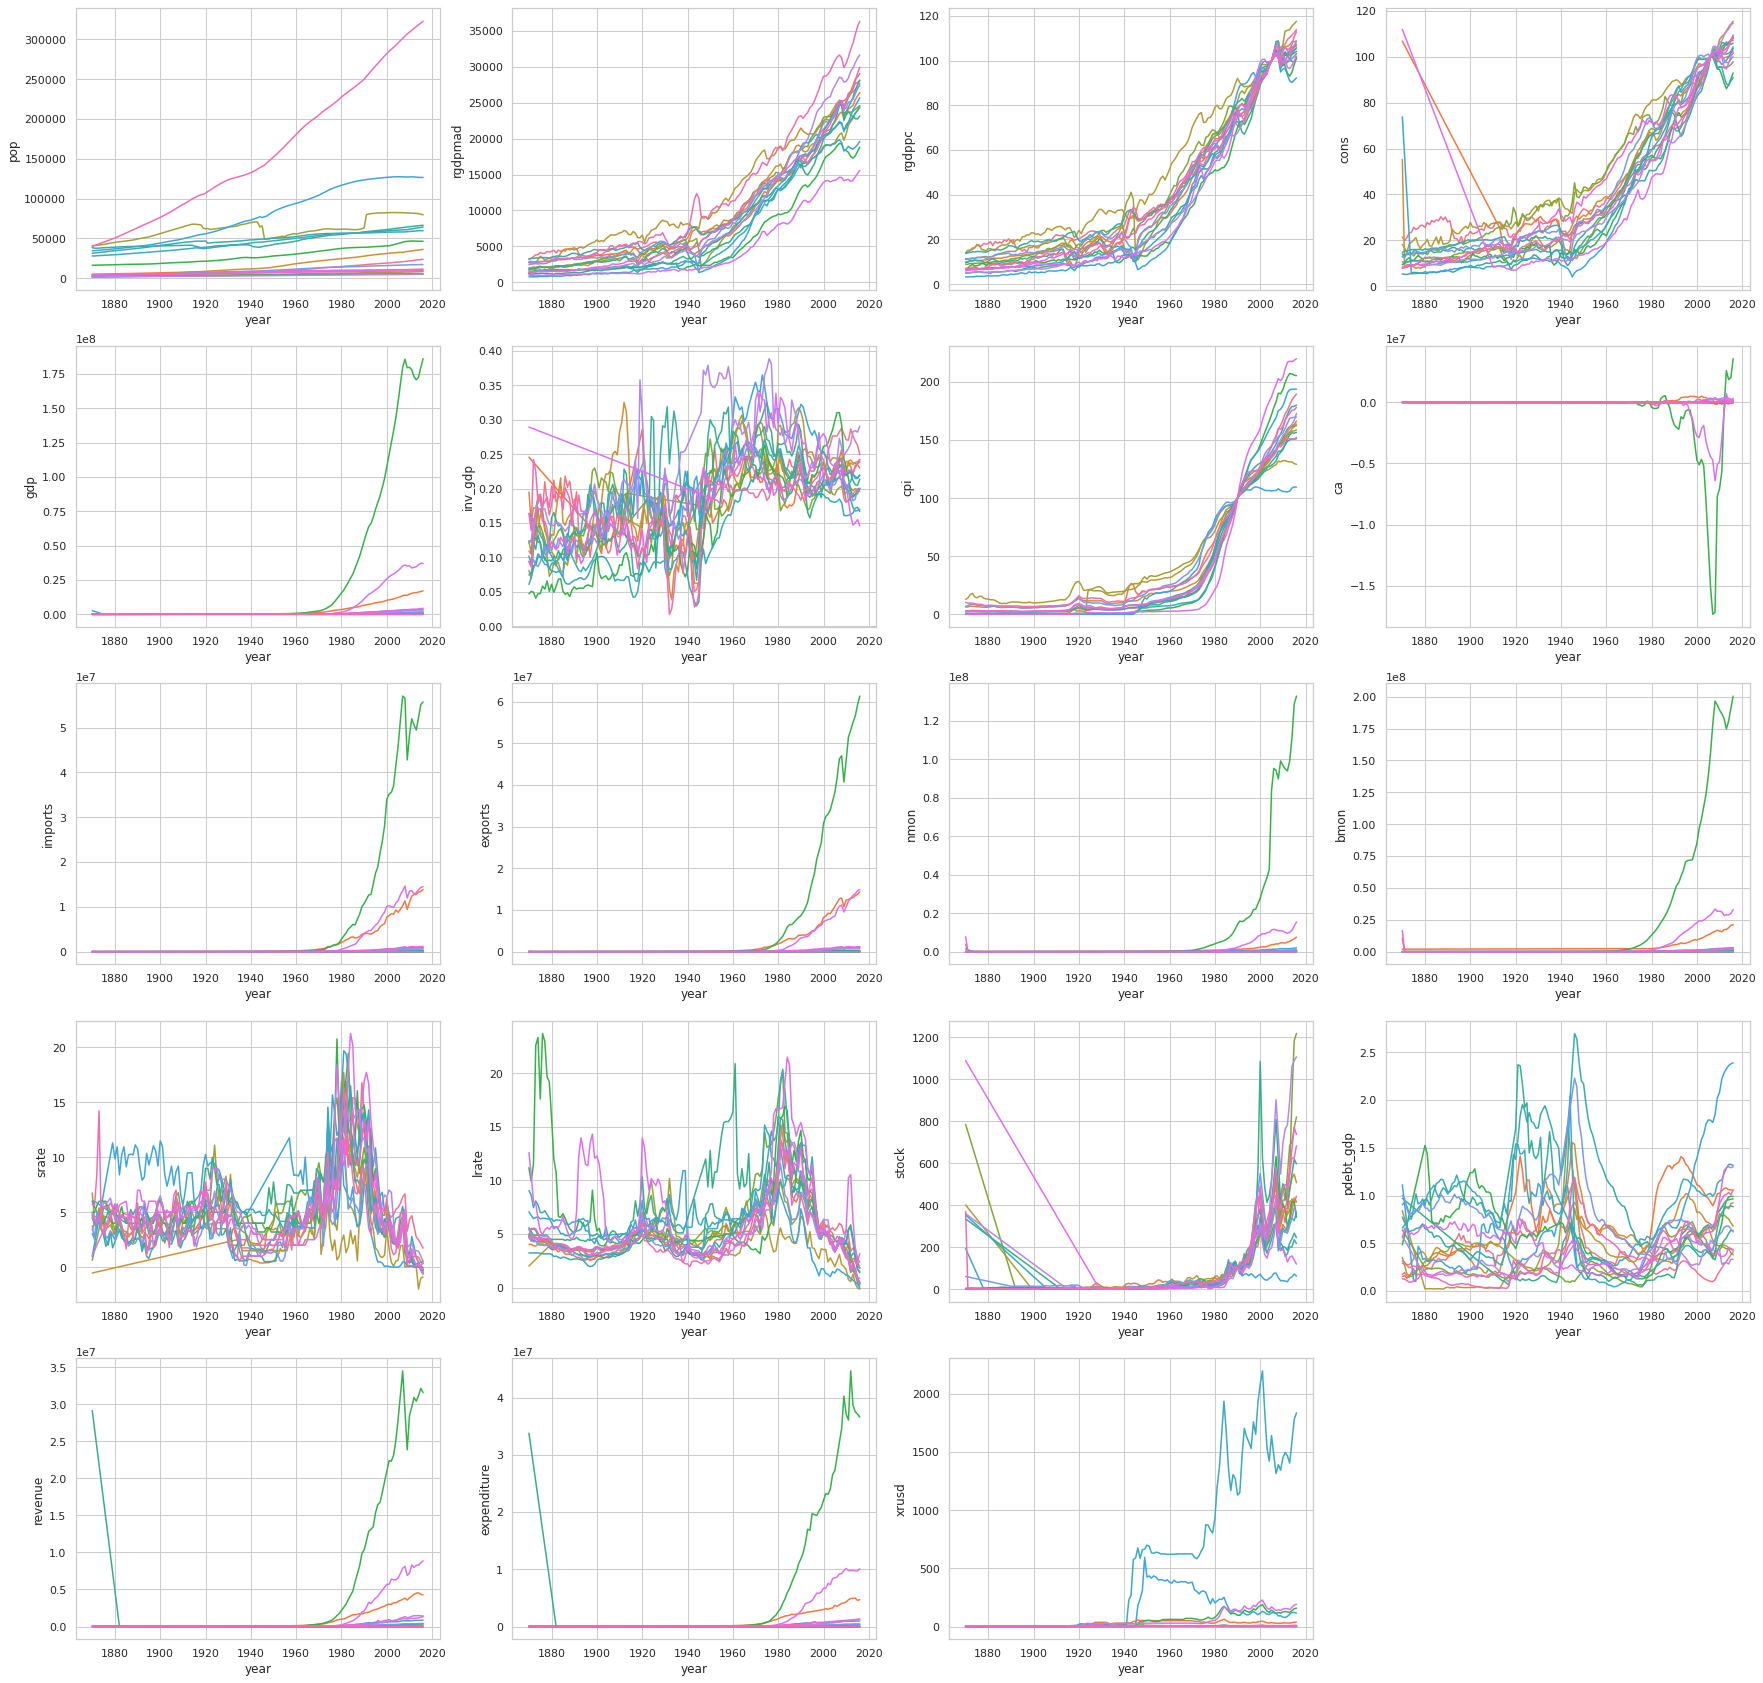

In [9]:
features_list =['pop', 'rgdpmad', 'rgdppc', 'cons',
       'gdp', 'inv_gdp', 'cpi', 'ca', 'imports', 'exports', 'nmon', 'bmon',
       'srate', 'lrate', 'stock', 'pdebt_gdp', 'revenue', 'expenditure',
       'xrusd',]
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))
count = 1
for predictor in features_list:

  plt.subplot(5,4,count)

  
  sns.lineplot(df['year'],
                 df[predictor],
                 hue='country',data=df)
  count+=1
  plt.legend([],[], frameon=False)

Plotting each variable/ feature wasn't very clear

![display image](https://media.giphy.com/media/WqLtlPiYbyPWvDkCjE/giphy.gif)


Feature Engineering

In [10]:
def make_ratio(data_input, variables, denominator="gdp"):

    names_out = []
    if isinstance(variables, str):
        variables = [variables]
    data = data_input.copy()
    for var in variables:
        varname = var + '_' + denominator
        data[varname] = data[var] / data[denominator]
        names_out.append(varname)
    return data, names_out


def make_shift(data_input, variables, type, horizon=5):

    names_out = []
    data = data_input.copy()
    data_group = data.groupby('iso')
    if isinstance(variables, str):
        variables = [variables ]
    for var in variables:
        if type == "absolute":
            varname = var + '_rdiff' + str(horizon)
            data[varname] = data_group[var].diff(horizon)
        elif type == "percentage":
            varname = var + '_pdiff' + str(horizon)
            data[varname] = data_group[var].apply(lambda x: lag_pct_change(x, h=horizon))
           

        names_out.append(varname)
    return data, names_out

def lag_pct_change(x, h):
  
    lag = np.array(pd.Series(x).shift(h))
    return (x - lag) / lag

In [11]:
horizon = 2
data_predictors = ["drate", "cpi_pdiff2" , "bmon_gdp_rdiff2", "stock_pdiff2","cons_pdiff2" ,
                   "pdebt_gdp_rdiff2", "inv_gdp_rdiff2", "ca_gdp_rdiff2",
                    "tloan_gdp_rdiff2", "tdbtserv_gdp_rdiff2",]  # Names of the indicators used as predictors

df.loc[:, 'drate'] = df['lrate'] - df['srate']  # differential rate is the slope of yeild curve

# Calculaute debt to service ratios
df.loc[:, 'tdbtserv'] = df['tloan'] * df['lrate'] / 100.0
df.loc[:, 'pdebt'] = df['pdebt_gdp'] * df['gdp']
df.loc[:, 'inv'] = df['inv_gdp'] * df['gdp'] 
isos = df['iso'].values
pre_gdp_ratios = ['bmon', 'nmon', 'tloan', 'bloan',
                      'hloan', 'mort', 'ca', 'cpi', 'tdbtserv',
                      'inv', 'pdebt'] 
df, gdp_ratios = make_ratio(df, pre_gdp_ratios, denominator='gdp')
df, _ = make_shift(df, ["lrate", "srate", "drate"] + gdp_ratios,
                       type="absolute", horizon=2)
                       
df, _ = make_shift(df, ['stock', 'cpi', 'hp', 'cons', 'gdp'] + pre_gdp_ratios,
                       type="percentage",
                       horizon=2)
years = df.year.values
crisis = df.crisis.values
# create the data set
features = df.loc[:, data_predictors]
data = features

data['crisis'] = crisis.astype(int)

data['year'] = years.astype(int)
data['iso'] = isos # name of countries


data = data.dropna()  # remove missing values
data = data.reset_index(drop=True)  # update index
df.dropna()
df.to_csv("Final_Dataset.csv")

### Transformation of the predictors for better stability and non-stationarity
On reading this research paper https://www.bankofengland.co.uk/-/media/boe/files/working-paper/2020/credit-growth-the-yield-curve-and-financial-crisis-prediction-evidence-from-a-machine-learning.pdf
I was able to transform certain features.

As we are trying to forecast Systemic crisis and it needs to be done before 1-2 years I changed the scale of GDP for 2 years growth.


**The transformed features are:**


1. drate:  It is the difference of short term and lonf term interest rate. (Yeild Curve)
2. tdbtserv_gdp_rdiff2: debt service ratio (credit x long term interest rate over GDP) 
3. Other Features are transformed into percentage growth rate or difference of GDP-RATIOS:

          i) percentage_differece features: 'stock_pdiff2', 'cpi_pdiff2' 'hp_pdiff2', 'cons_pdiff2', 'gdp_pdiff2', 'bmon_pdiff2', 'nmon_pdiff2','tloan_pdiff2', 'bloan_pdiff2', 'hloan_pdiff2', 'mort_pdiff2','ca_pdiff2', 'tdbtserv_pdiff2', 'inv_pdiff2', 'pdebt_pdiff2'

          ii) GDP-ratios: tdbtserv_gdp', 'lrate_rdiff2', 'srate_rdiff2', 'drate_rdiff2',bmon_gdp_rdiff2', 'nmon_gdp_rdiff2','tloan_gdp_rdiff2','bloan_gdp_rdiff2', 'hloan_gdp_rdiff2', 'mort_gdp_rdiff2','ca_gdp_rdiff2', 'cpi_gdp_rdiff2', 'tdbtserv_gdp_rdiff2','inv_gdp_rdiff2', 'pdebt_gdp_rdiff2'



## Justification and explanation of transformed features:

  

---


By defination drate is a strong predictor of an impending economic recession. A flat curve can suggest that the banking sector profit is weak which can in turn lead to predict financial crisies. 

**On visualization we can see that it justifies the definition. For mostly every country whenever drate <= 0 the country has gone under crisis.**


---

**Credit growth** means number of loans. Higher the number of loans more is the debt which is a risk and can further lead to financial instabilty


---
Indicators that I used are present in predictor list. All the indicators are present in **Final_Dataset**.csv


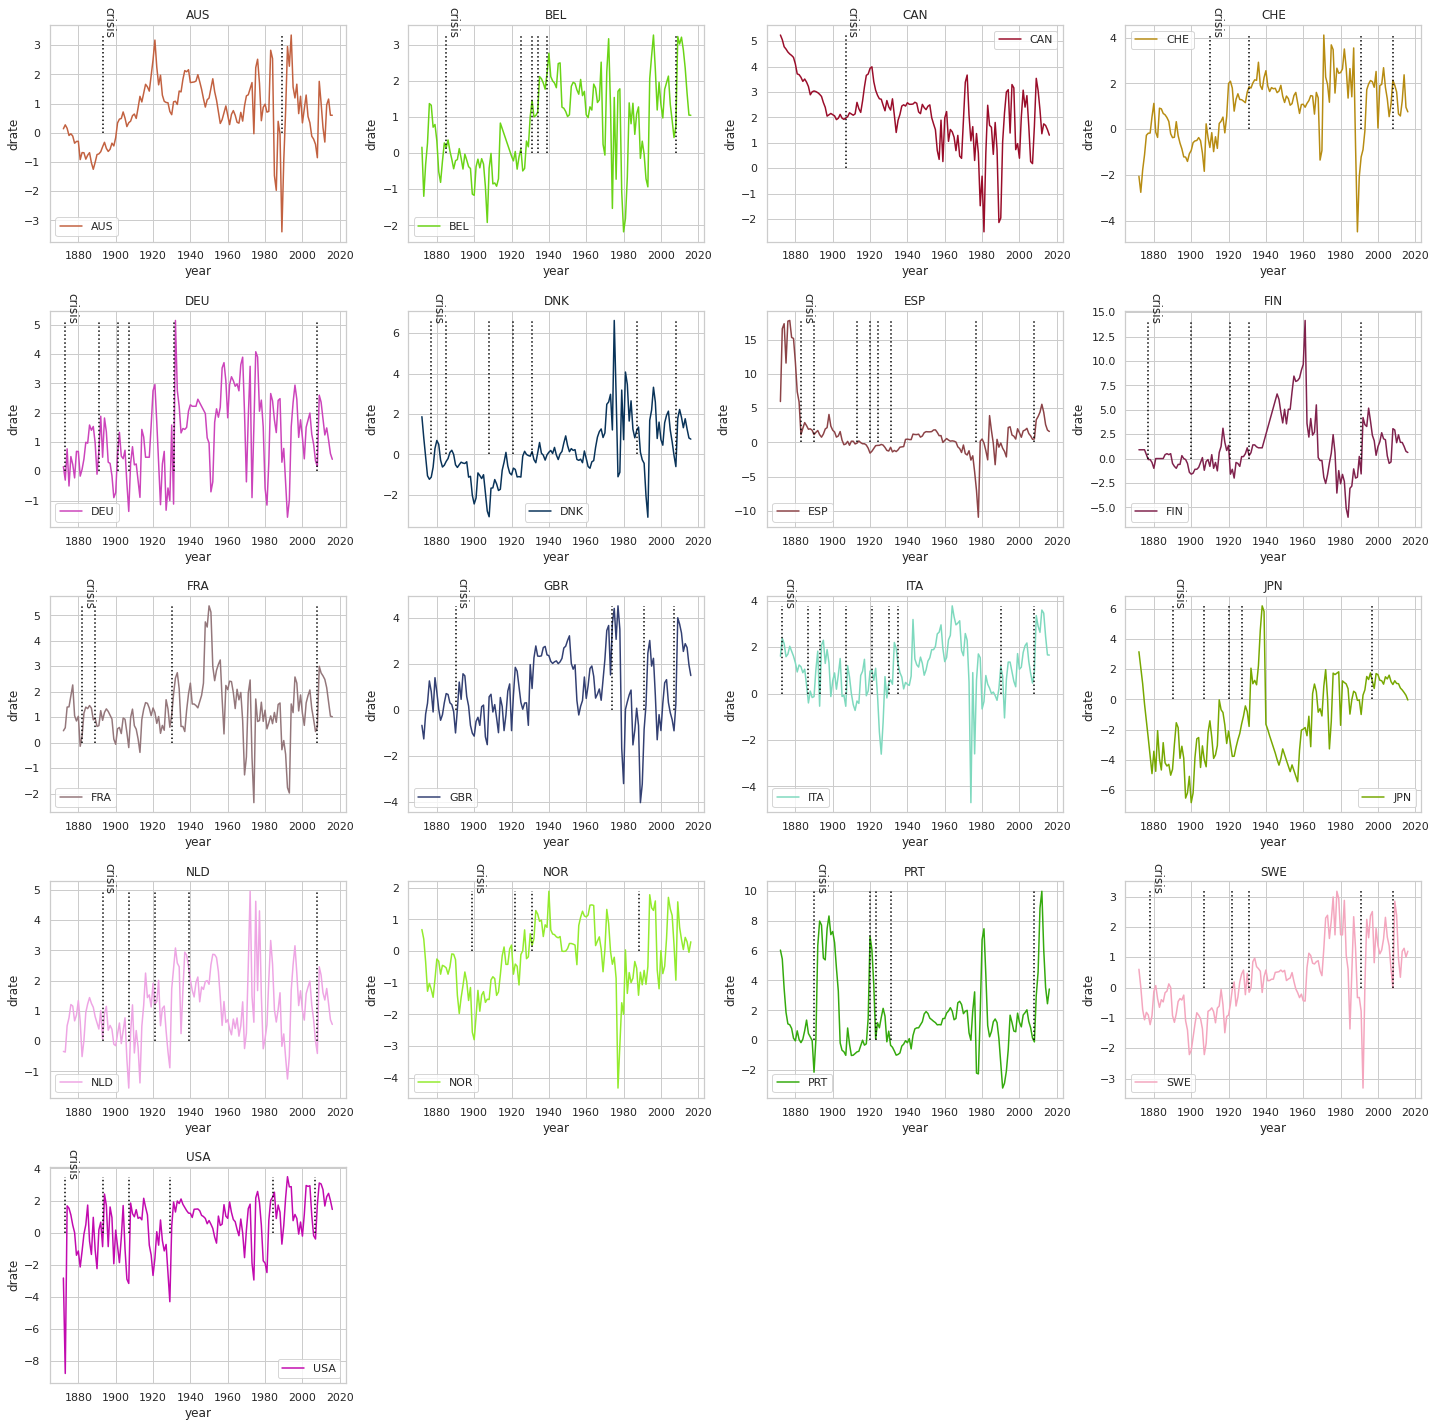

In [12]:
# data = df
import matplotlib.pyplot as plt
import seaborn as sns
import random

variable_list = ['drate']

for variable in variable_list:

    sns.set(style='whitegrid')
    plt.figure(figsize=(20,20))
    count=1

    # variable = "inv_gdp_rdiff2"
    #countries_list = ['BEL',  'DEU', 'DNK', 'ESP',  'ITA', 'JPN',  'SWE', 'USA']
    countries_list = list(df['iso'].unique())
    for country in countries_list:

        plt.subplot(5,4,count)
        count+=1
        col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        sns.lineplot(data[data.iso==country]['year'],
                    data[data.iso==country][variable],
                    label=country,
                    color=col)

        plt.plot([(data[np.logical_and(data.iso==country,data.crisis==1)]['year'].unique()),
                  (data[np.logical_and(data.iso==country,data.crisis==1)]['year'].unique())],
                [0,
                  np.max(data[data.iso==country][variable])],
                color='black',
                linestyle='dotted',
                alpha=1)

        plt.text(np.min(data[np.logical_and(data.iso==country,data.crisis==1)]['year']),
                np.max(data[data.iso==country][variable]),
                'crisis',
                rotation=-90)

        plt.title(country)
    plt.tight_layout()
    plt.show()

#####The next cell can be used to go through different features just like above by using the variable_list. It has the features that I think will be the most important

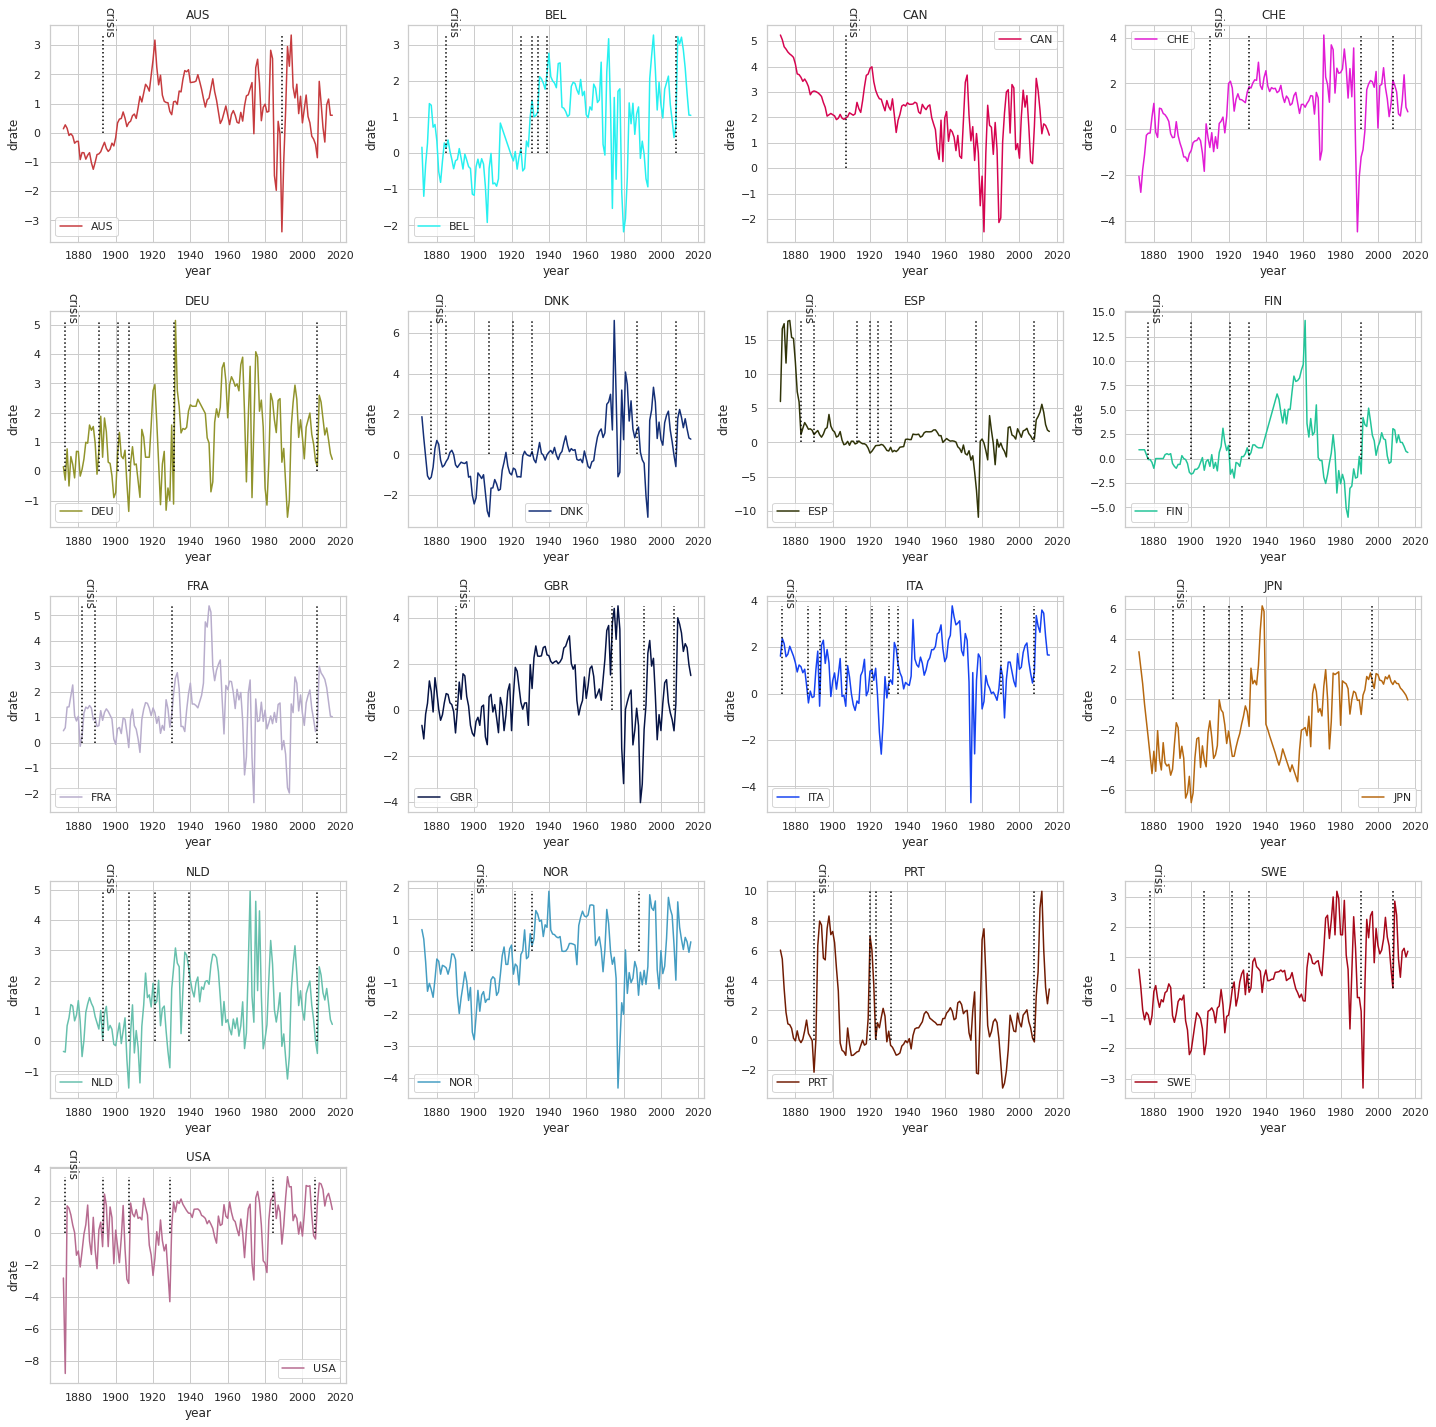

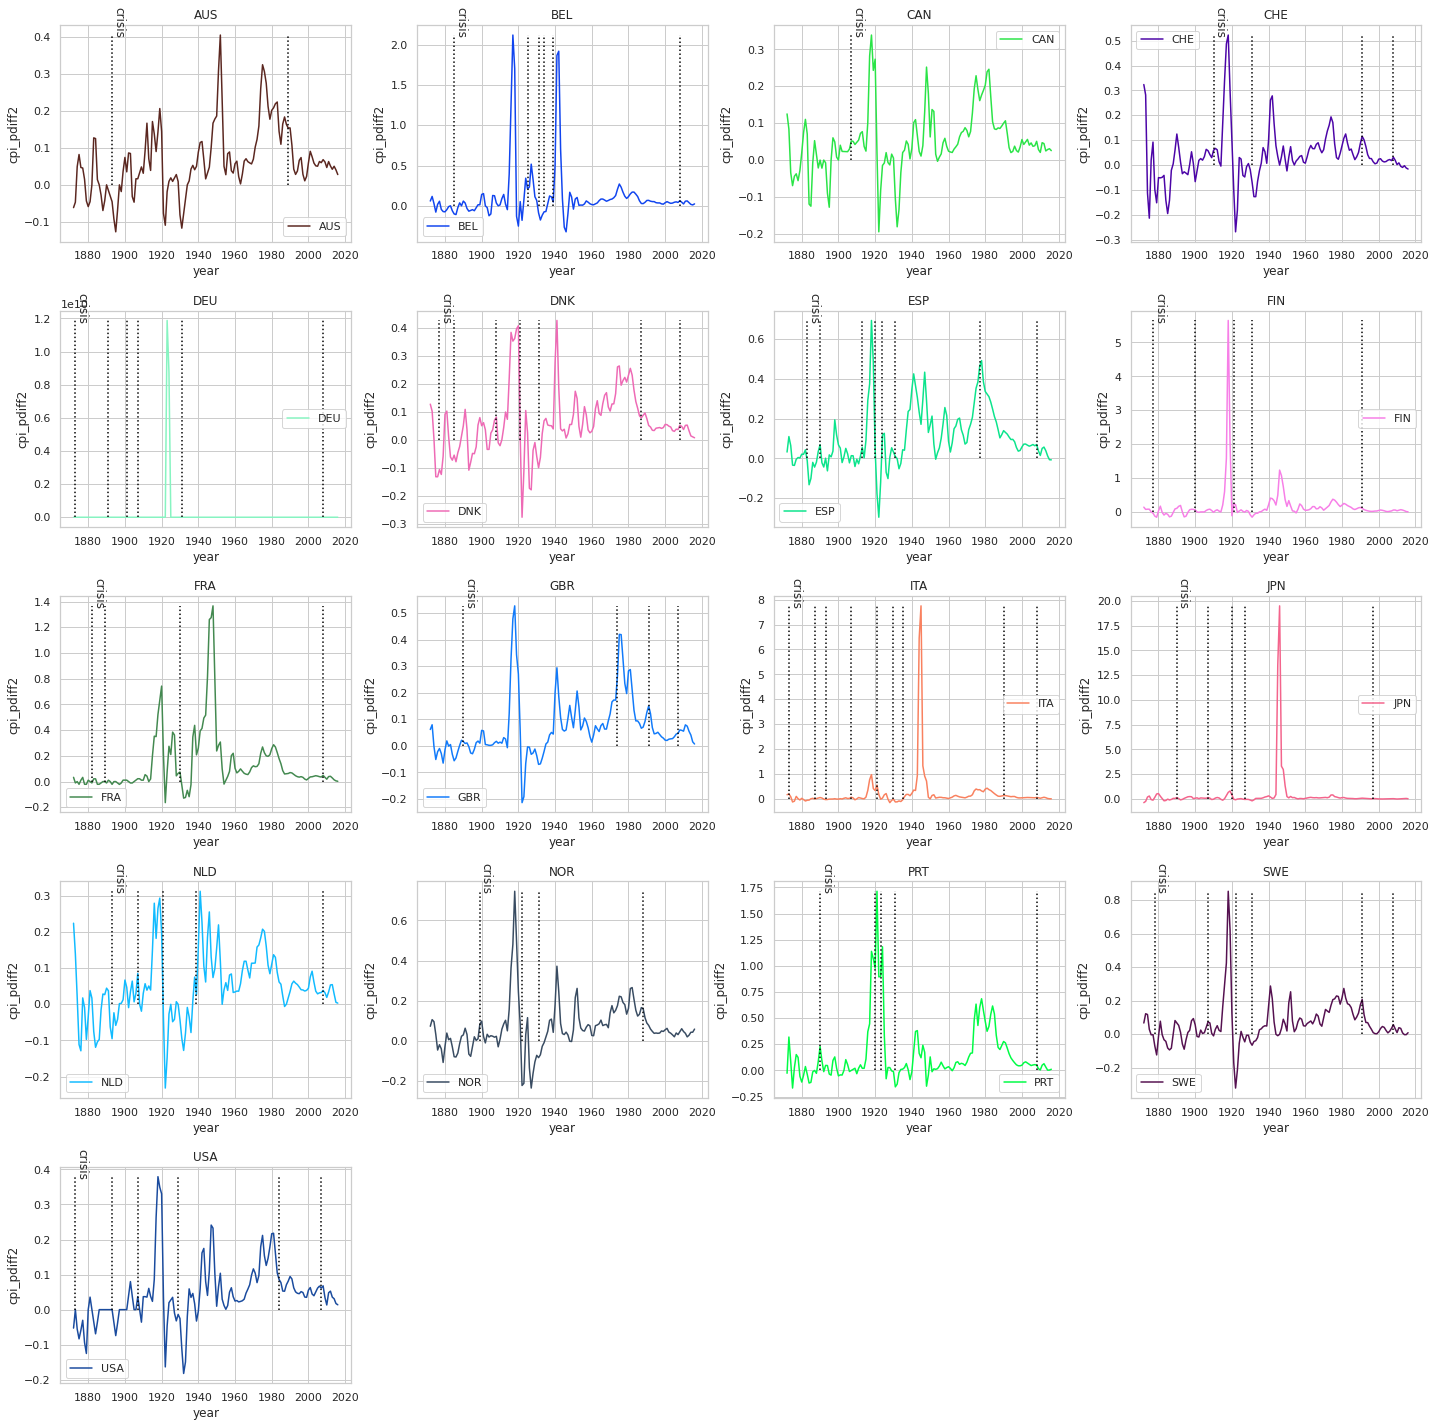

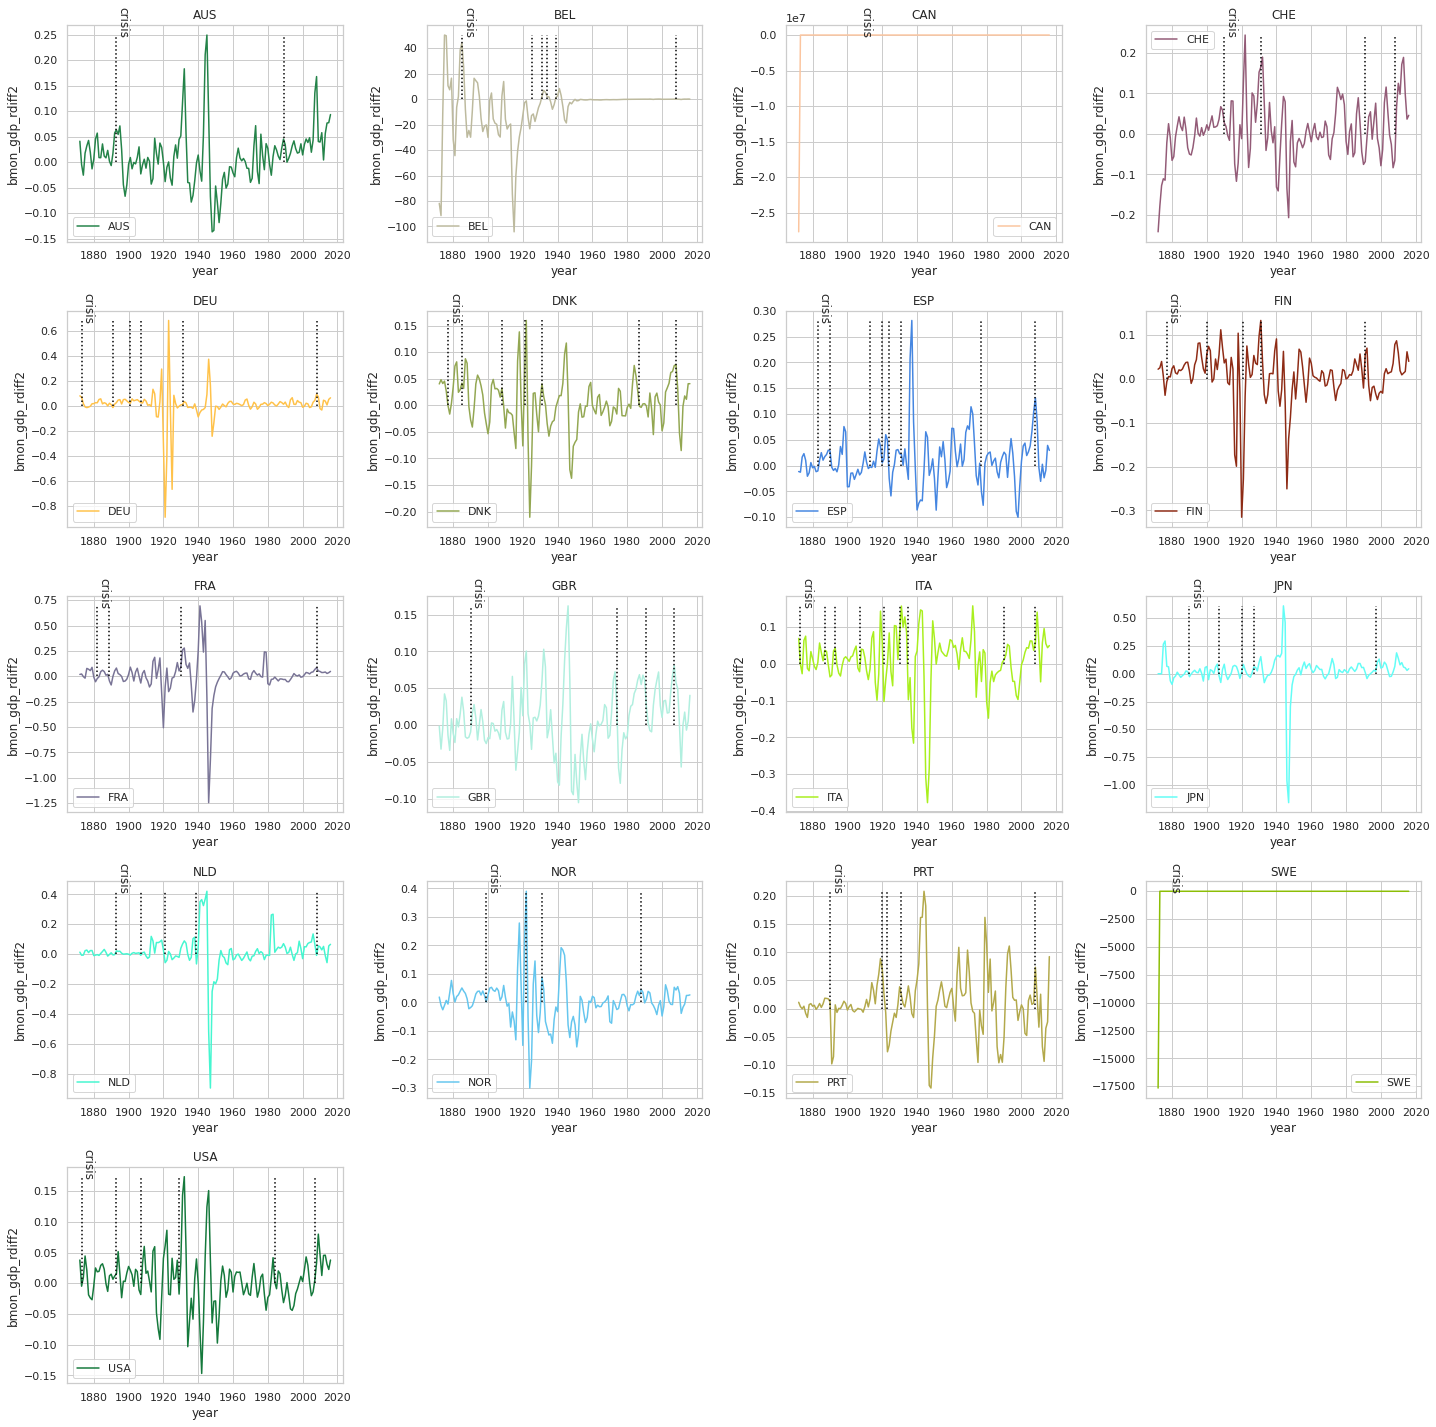

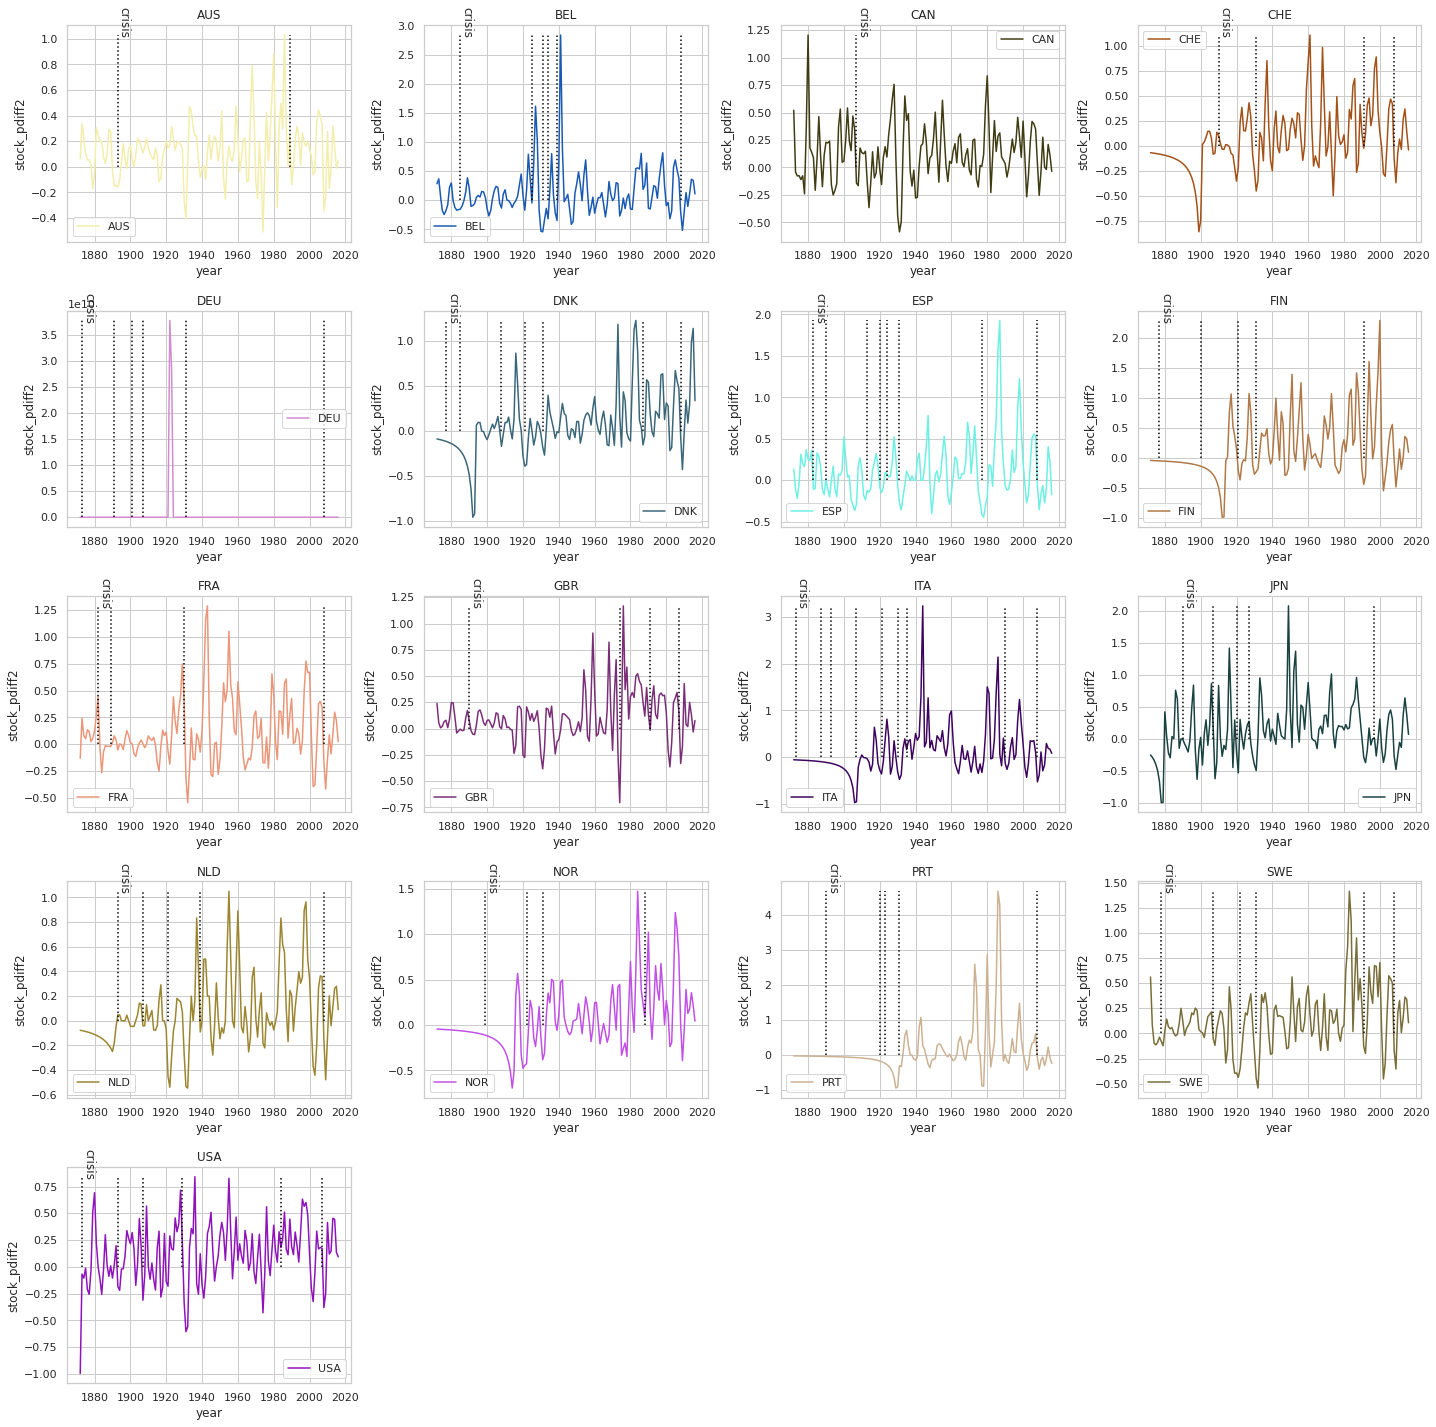

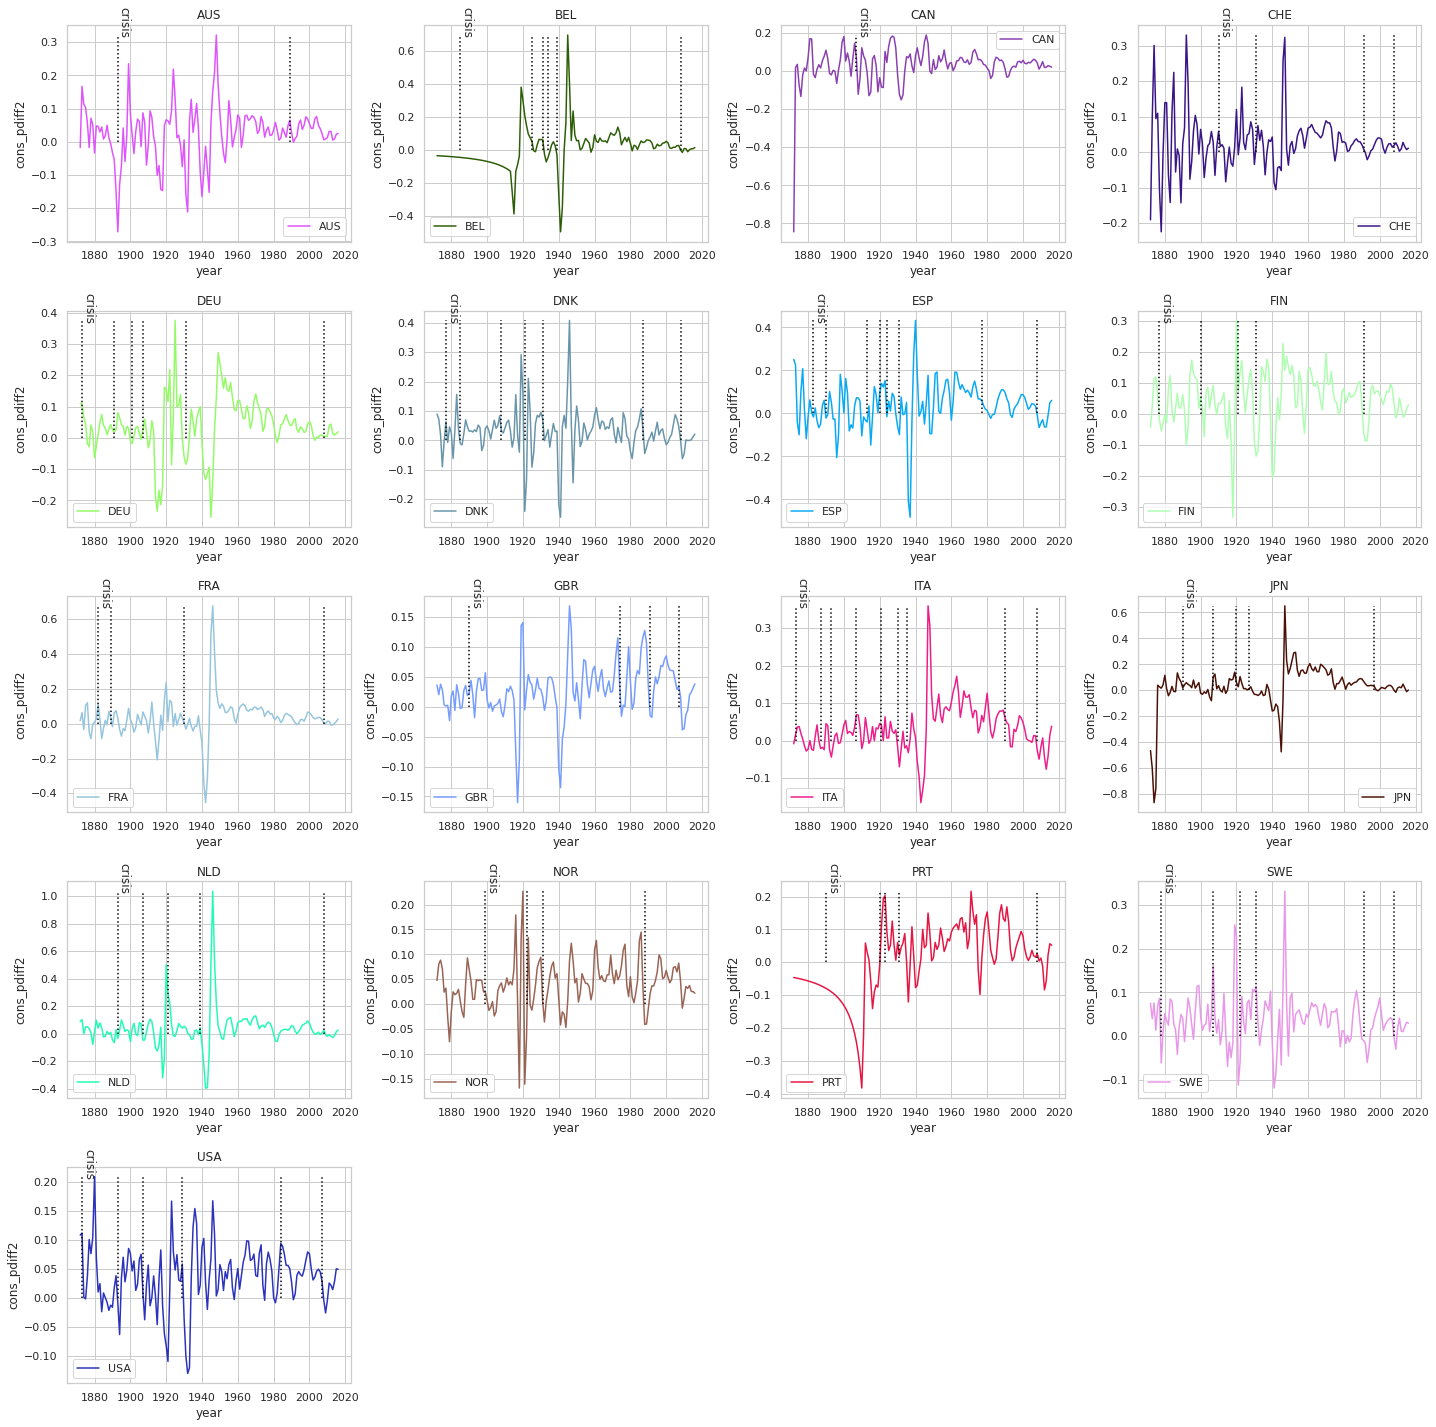

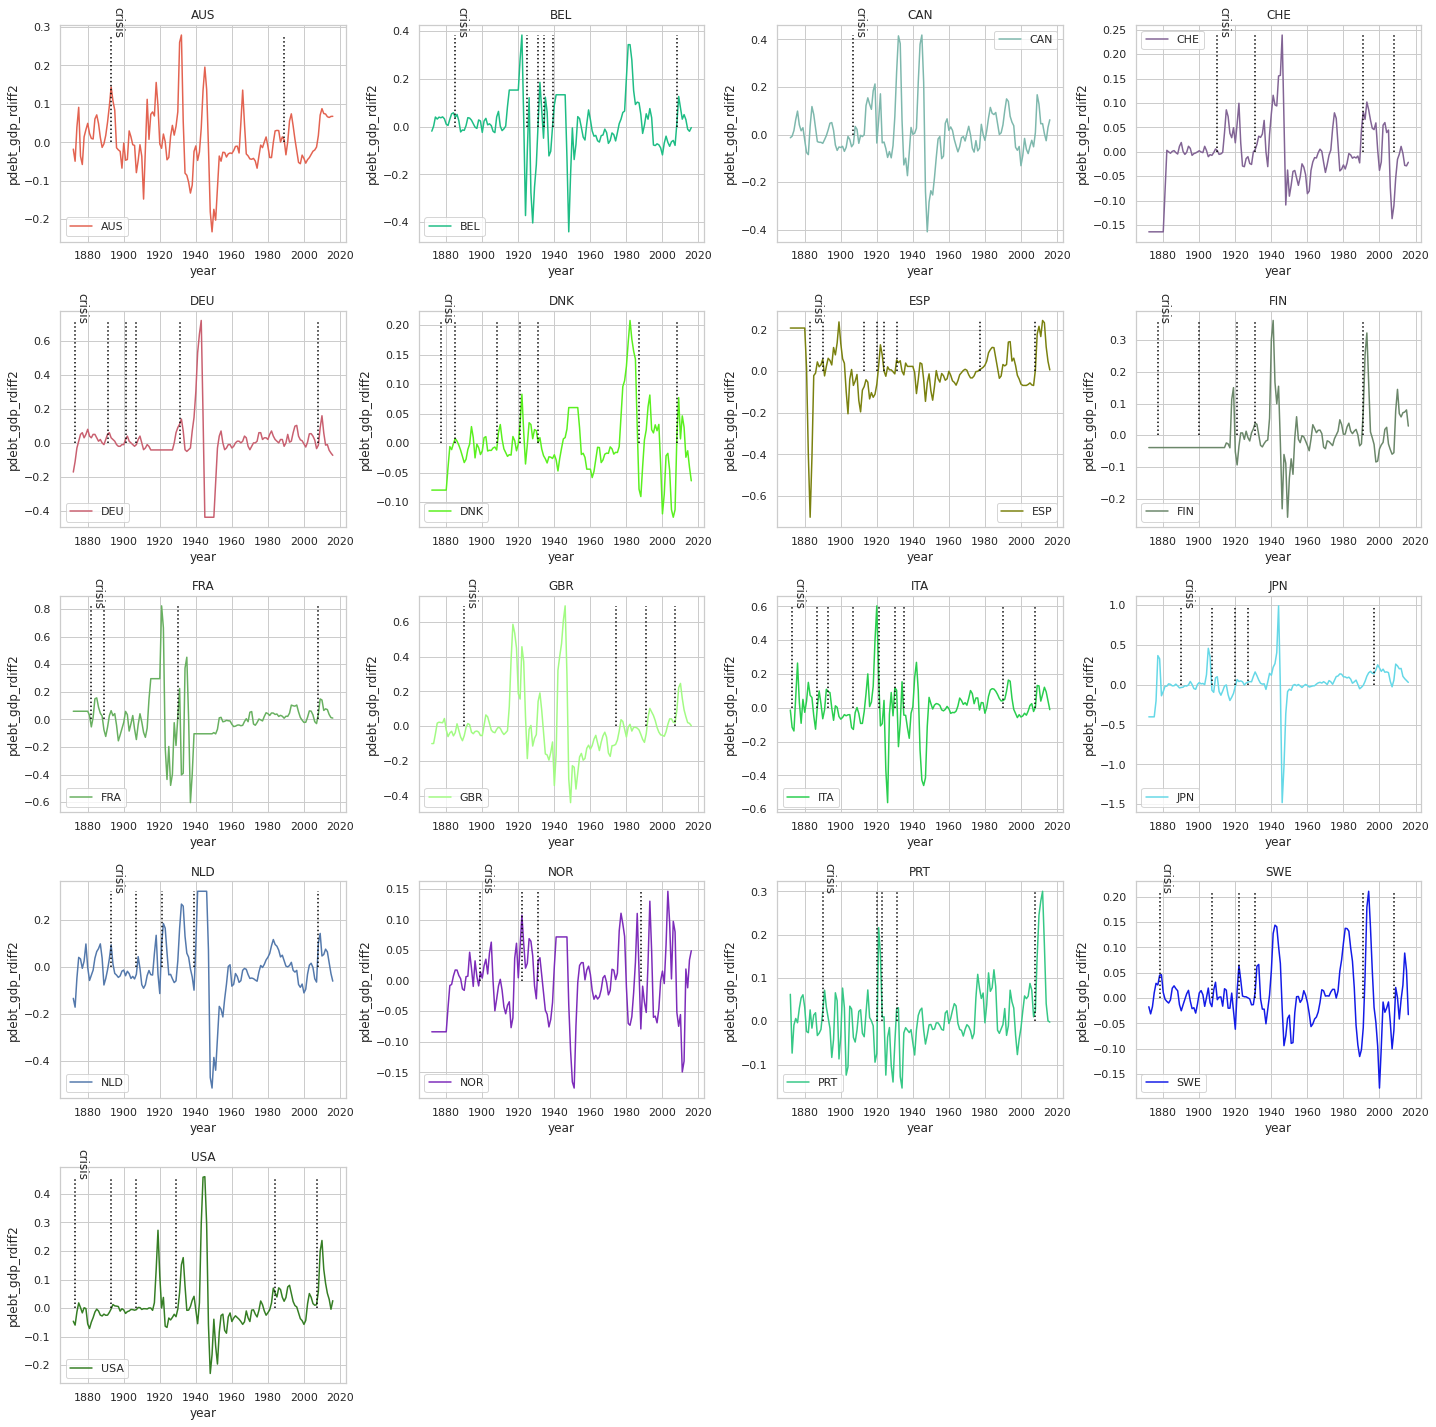

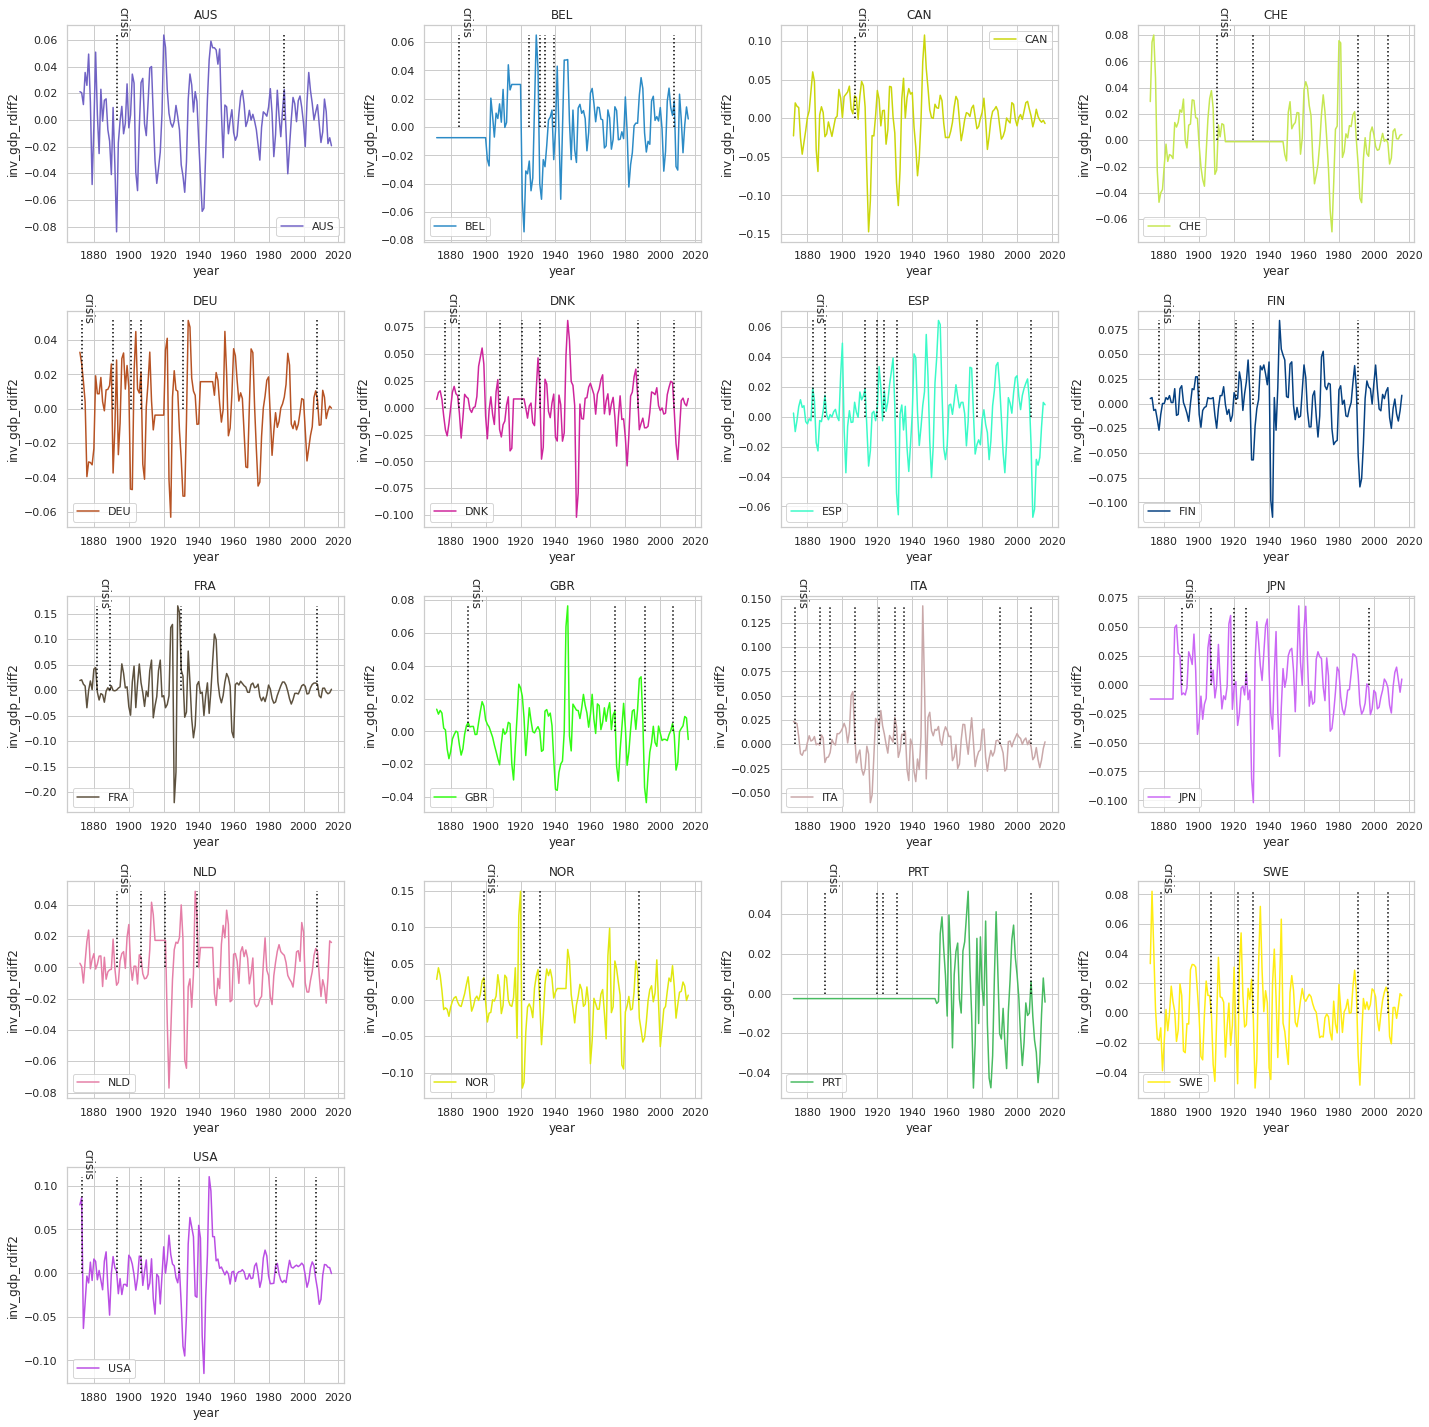

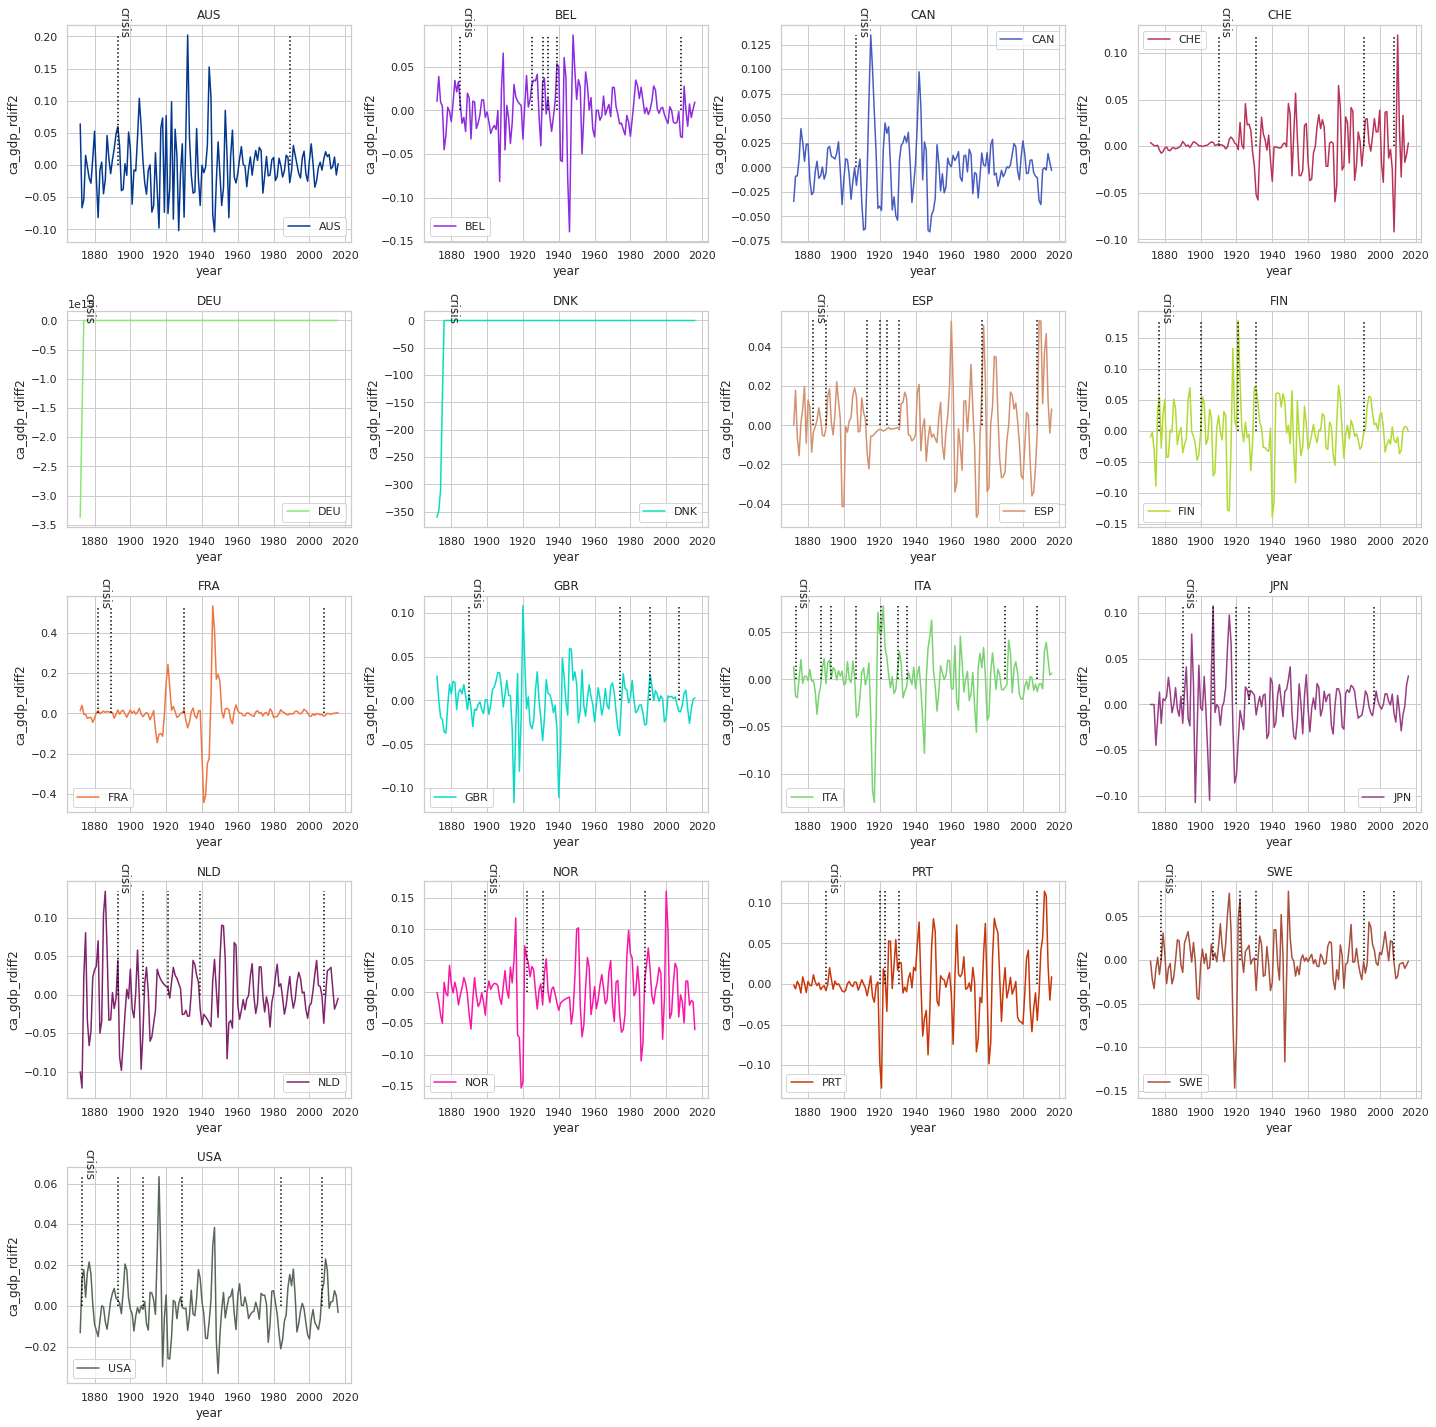

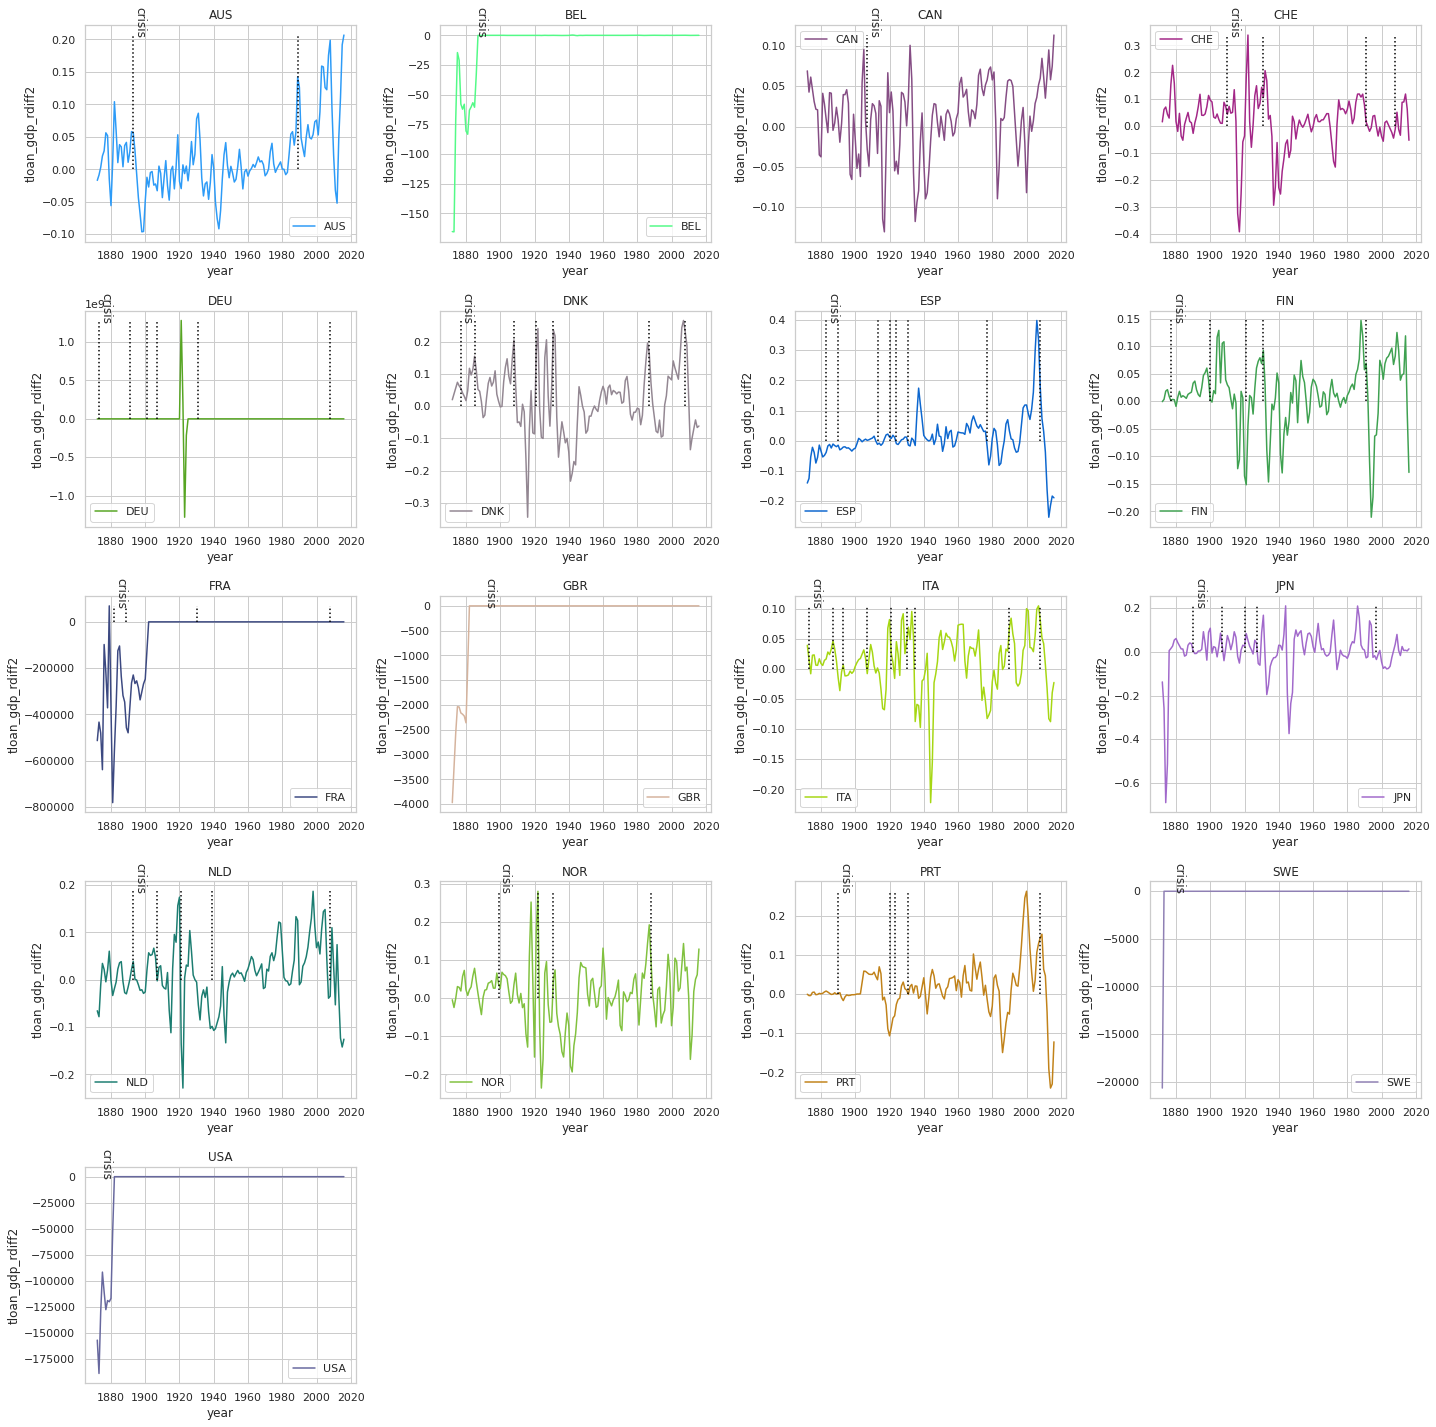

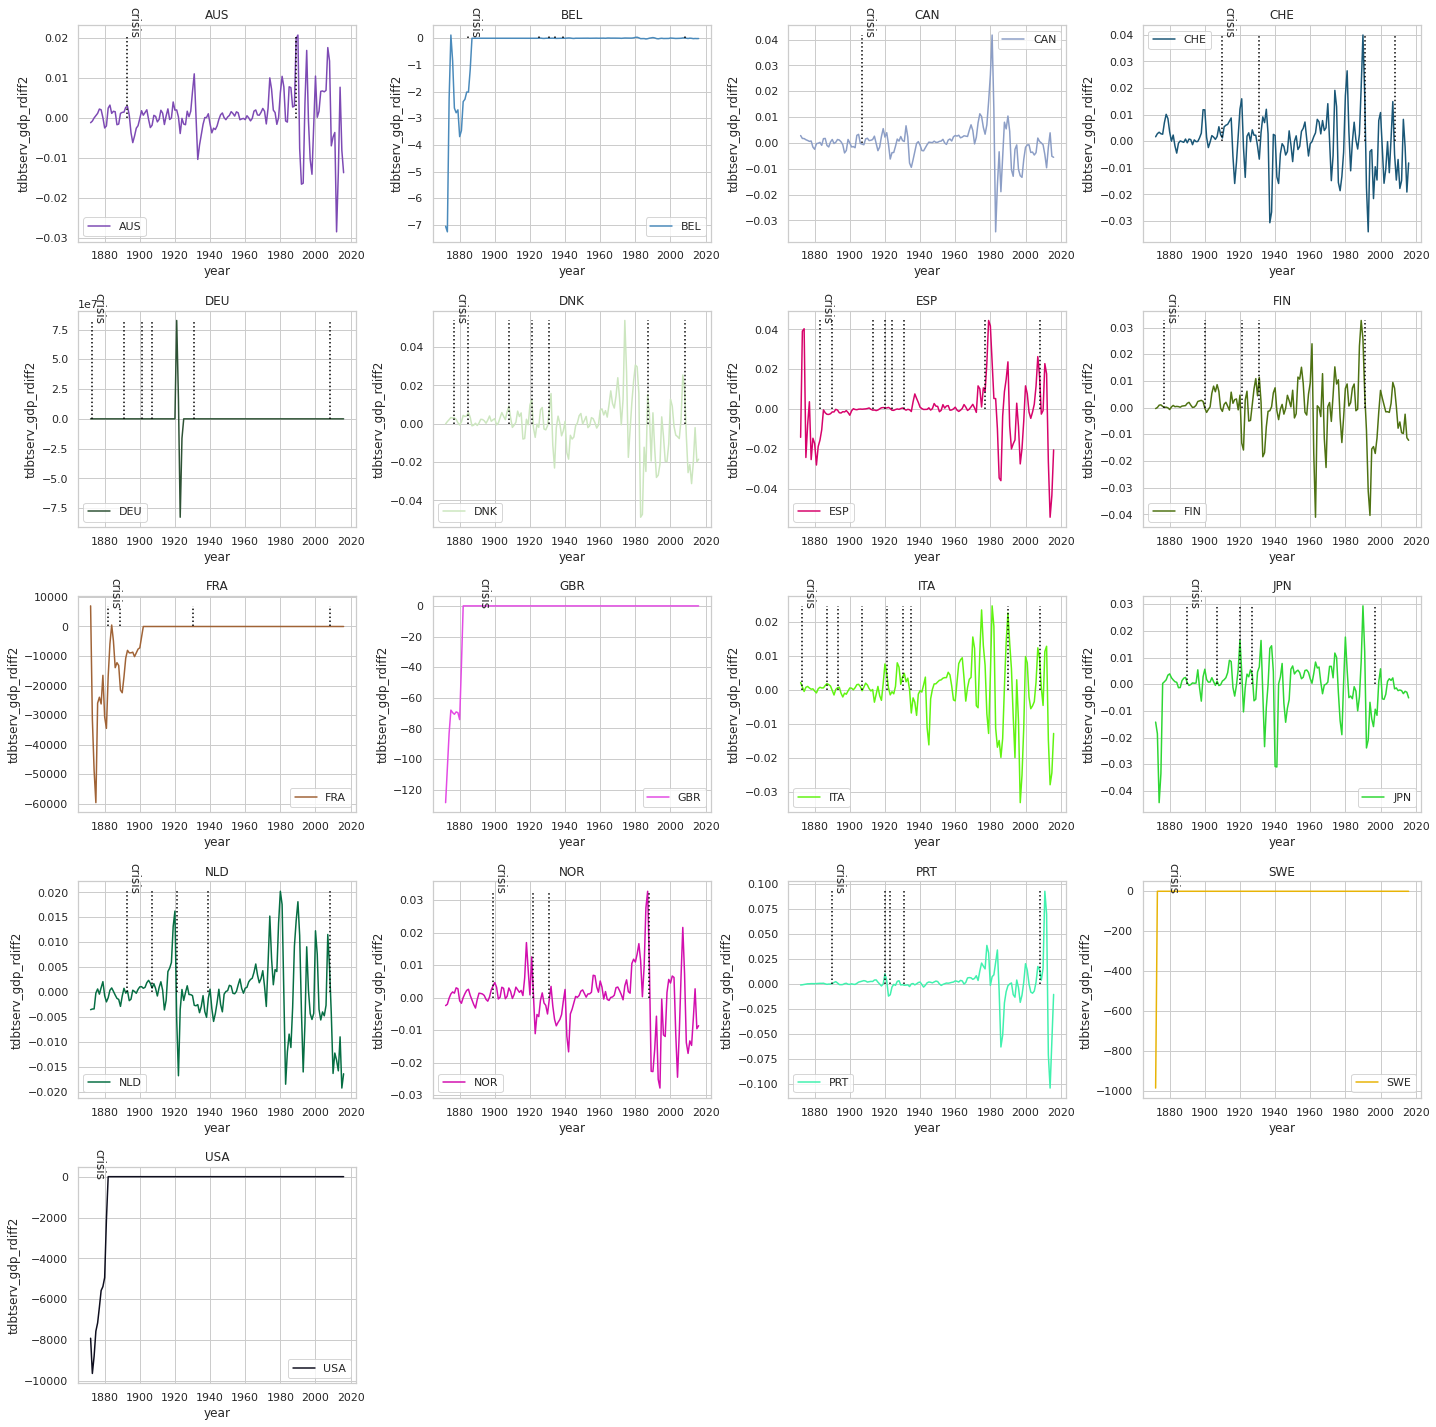

In [13]:
# data = df
import matplotlib.pyplot as plt
import seaborn as sns
import random

variable_list = ['drate', 'cpi_pdiff2', 'bmon_gdp_rdiff2', 'stock_pdiff2', 'cons_pdiff2',
       'pdebt_gdp_rdiff2', 'inv_gdp_rdiff2', 'ca_gdp_rdiff2',
       'tloan_gdp_rdiff2', 'tdbtserv_gdp_rdiff2']

for variable in variable_list:

    sns.set(style='whitegrid')
    plt.figure(figsize=(20,20))
    count=1

    # variable = "inv_gdp_rdiff2"
    #countries_list = ['BEL',  'DEU', 'DNK', 'ESP',  'ITA', 'JPN',  'SWE', 'USA']
    countries_list = list(df['iso'].unique())
    for country in countries_list:

        plt.subplot(5,4,count)
        count+=1
        col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        sns.lineplot(data[data.iso==country]['year'],
                    data[data.iso==country][variable],
                    label=country,
                    color=col)

        plt.plot([(data[np.logical_and(data.iso==country,data.crisis==1)]['year'].unique()),
                  (data[np.logical_and(data.iso==country,data.crisis==1)]['year'].unique())],
                [0,
                  np.max(data[data.iso==country][variable])],
                color='black',
                linestyle='dotted',
                alpha=1)

        plt.text(np.min(data[np.logical_and(data.iso==country,data.crisis==1)]['year']),
                np.max(data[data.iso==country][variable]),
                'crisis',
                rotation=-90)

        plt.title(country)
    plt.tight_layout()
    plt.show()

### Which factors are mostly associated with Systemic Crises ?
* Test of association (using correlation test) and statistical Significance (using Logistic Regression Test)

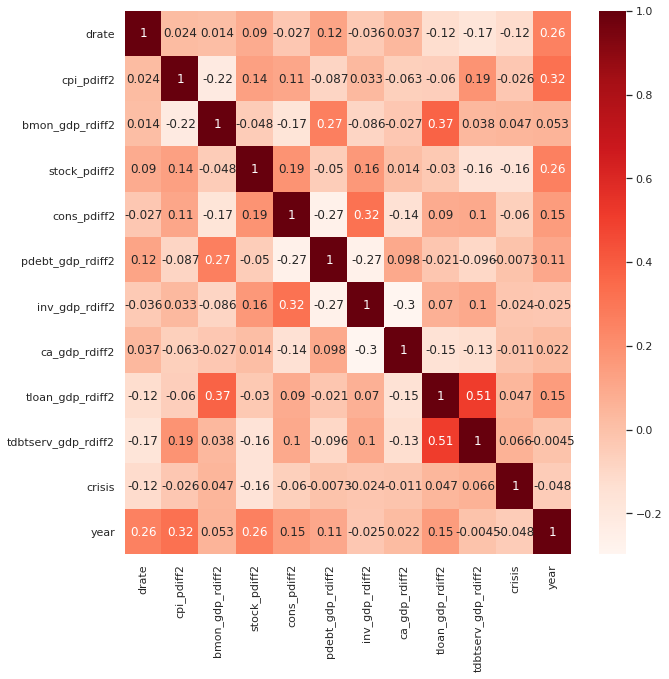

In [14]:
#Correlation Matrix
plt.figure(figsize=(10,10))
cor = data.corr(method='spearman')#Correlation with output variable
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



# We cannot see any linear relationship and hence comparing the predictors can be difficult. Hence the variables need to be transformed (i.e Feature Engineering)

**Is the relationship between Systemic crisis and the related covariates statistically sifnificant?**

H0: The association between Systemic Crisis and the other covariates is statistically significant

H1: The association between Systemic Crisis and the other covariates is not statistically significant

In [15]:
from statsmodels.formula.api import logit
#Drop country since it is not numerical and systemic crisis because it has a strong positive correlation 
#with Banking Crisis hence might dominate.
temp_df = data
df2 = data[['crisis','drate','cpi_pdiff2','bmon_gdp_rdiff2', 'stock_pdiff2','cons_pdiff2',
       'pdebt_gdp_rdiff2', 'inv_gdp_rdiff2', 'ca_gdp_rdiff2',
       'tloan_gdp_rdiff2', 'tdbtserv_gdp_rdiff2']].dropna()
# Logistic Regression
s_crisis = logit(formula=" crisis~ + drate +cpi_pdiff2+bmon_gdp_rdiff2+stock_pdiff2 + pdebt_gdp_rdiff2 + inv_gdp_rdiff2 +ca_gdp_rdiff2+tloan_gdp_rdiff2+ tdbtserv_gdp_rdiff2", data=df2).fit()
print(s_crisis.summary())

Optimization terminated successfully.
         Current function value: 0.143556
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:                 crisis   No. Observations:                 2465
Model:                          Logit   Df Residuals:                     2459
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                 0.05981
Time:                        18:38:16   Log-Likelihood:                -353.87
converged:                       True   LL-Null:                       -376.38
Covariance Type:            nonrobust   LLR p-value:                 1.434e-08
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.2675      0.115    -28.399      0.000      -3.493      -3.042
d

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


**Result Interpretation**

* From the correlation matrix:
      1. Systemic Crisis is negatively correlated with drate which makes sense becasue we saw that in the graphs above.

* From the Logit Regression Results:
      1. The association between systemic crisis and drate,bmon_gdp_rdiff2,inv_gdp_rdiff2 is statistically significant (P-Value < 0.05).

      2. On the other hand,cpi_pdiff2,stock_pdiff2,pdebt_gdp_rdiff2,tdbtserv_gdp_rdiff2 have no significant association with Systemic crisis (P-Value > 0.05).

# Conclusion:

Economic drivers are good indicators of Systemic Risk and can be used further.

Modeling Ideas based on this data:
1. First idea would be to use SVM. non-linear kernel of SVM can be used to predict the probability of Systemic crisis
2. Using an expanding window, this requires
predictions to be made based only upon data available until the given point in time, so
that any out-of-sample test is later in time.
3. When creating a forecasting model,all observations in the training set
must be from earlier years than the observations in the test set. In order to do that we need make a recursive forecasting experiment.

![display image](https://media.giphy.com/media/OYXfmzCA0zggbqEaE9/giphy.gif)


# Things that aren't taken care of and can cause problems !

1. Using just these indicators is an oversimplification of Systemic Risk. I believe other data like top 4 banks from each country can be included as well because they play a very important role in this.

2. We have included data during the  WW2 which is an exception case and hence the economin indicators during that period might not be accurate to calculate systemic risk

3. Instead of interpolation certain data could have been removed if it was during non-crises phase.

4. Overcoming systemic crisis can take a couple of years and hence I should have included post-crisis phase as well